# Auto Similarity 

Feature analysis of automobiles.

Dataset can be found at the UCI Machine Learning Repository: [Auto MPG Dataset](https://archive.ics.uci.edu/ml/datasets/auto+mpg)

This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition.

In [1]:
%matplotlib inline

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

# Modify the style of the plots 
sns.set_context('notebook')
sns.set_style('whitegrid')

## Data Loading 

Download the `auto.data` file from the UCI ML Repository and store it in a folder called `data` that is in the same directory as this notebook.

The data loader creates a Pandas DataFrame with named columns and adds a feature for the make of the vehicle by parsing the `car name` field. It also replaces `"?"` with `np.nan` for fields with missing values. 

In [2]:
feature_names = [
    "mpg",
    "cylinders",
    "displacement",
    "horsepower",
    "weight",
    "acceleration", 
    "model year",
    "origin",
    "car name",
]

def load_data(path="data/auto.data"):
    data = pd.read_csv('data/auto.data', delimiter='\s+', header=None)
    data.columns = feature_names
    
    # Get the make of the vehicle as the first word in the name 
    data['make'] = data['car name'].apply(lambda s: s.split()[0])
    
    # Replace '?' with np.nan 
    data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')
    
    return data 

In [3]:
df = load_data() 
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
make             object
dtype: object

## Data Exploration

In [4]:
df['make'].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

Text(0.5,0,'weight (kg)')

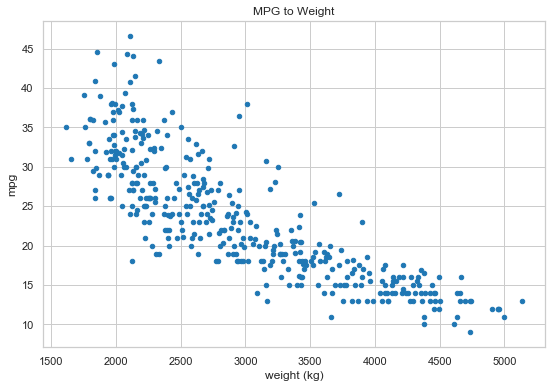

In [5]:
_, ax = plt.subplots(figsize=(9,6))
df.plot(kind='scatter', x='weight', y='mpg', ax=ax)

ax.set_title("MPG to Weight")
ax.set_xlabel("weight (kg)")

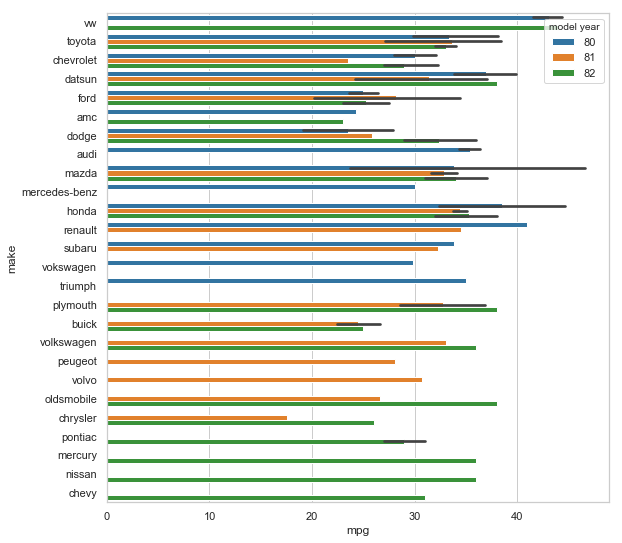

In [6]:
_, ax = plt.subplots(figsize=(9,9))
sns.barplot(y='make', x='mpg', hue='model year', ax=ax, data=df[df['model year']>=80])

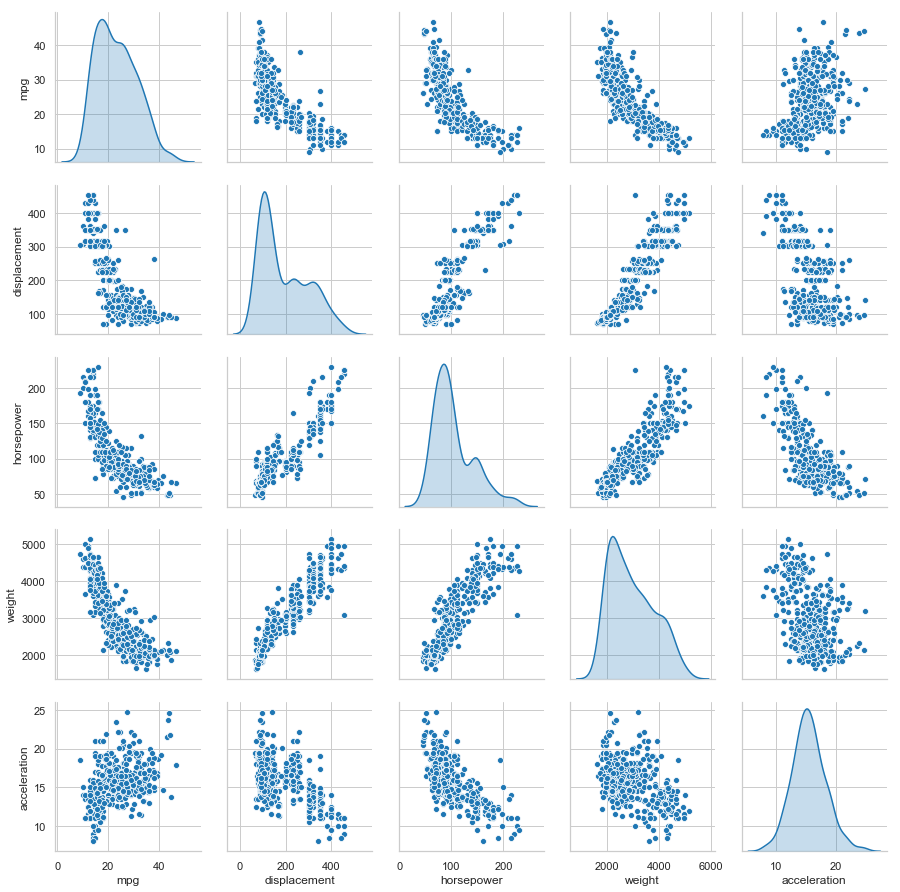

In [7]:
numeric_features = [
    "mpg",
    "displacement",
    "horsepower",
    "weight",
    "acceleration", 
]

sns.pairplot(data=df[numeric_features].dropna(), diag_kind='kde')

In [8]:
df[numeric_features].head()

,mpg,displacement,horsepower,weight,acceleration
0,18.0,307.0,130.0,3504.0,12.0
1,15.0,350.0,165.0,3693.0,11.5
2,18.0,318.0,150.0,3436.0,11.0
3,16.0,304.0,150.0,3433.0,12.0
4,17.0,302.0,140.0,3449.0,10.5


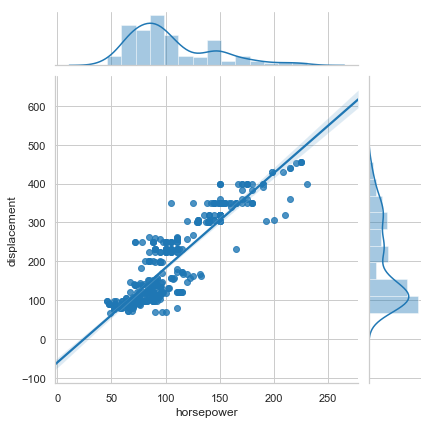

In [9]:
sns.jointplot(data=df[numeric_features].dropna(), x='horsepower', y='displacement', kind='reg')

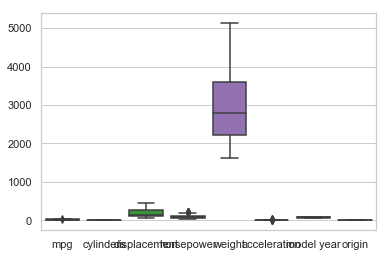

In [10]:
sns.boxplot(data=df)

In [11]:
feature_names = [
    "cylinders",
    "displacement",
    "horsepower",
    "weight",
    "acceleration", 
    "model year",
    "origin",
]

target_name = 'mpg'

X = df.dropna()[feature_names]
y = df.dropna()[target_name]

[]

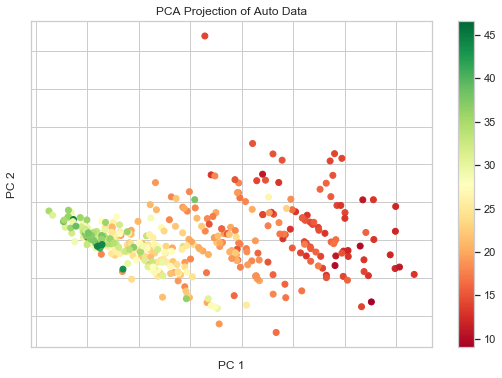

In [12]:
from sklearn.decomposition import PCA, TruncatedSVD 

Xt = PCA(n_components=2).fit_transform(X)
_, ax = plt.subplots(figsize=(9,6))

s  = ax.scatter(Xt[:,0], Xt[:,1], c=y, cmap='RdYlGn', label='PCA Projection')
cb = plt.colorbar(s)

ax.set_title('PCA Projection of Auto Data')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_xticklabels([])
ax.set_yticklabels([])

[]

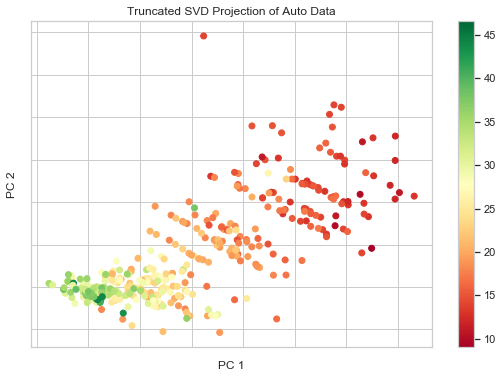

In [13]:
Xt = TruncatedSVD(n_components=2).fit_transform(X)
_, ax = plt.subplots(figsize=(9,6))

s  = ax.scatter(Xt[:,0], Xt[:,1], c=y, cmap='RdYlGn', label='SVD Projection')
cb = plt.colorbar(s)

ax.set_title('Truncated SVD Projection of Auto Data')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_xticklabels([])
ax.set_yticklabels([])

In [14]:
from yellowbrick.features import Manifold
from yellowbrick.features import PCADecomposition

/Users/benjamin/.pyenv/versions/3.6.2/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/benjamin/.pyenv/versions/3.6.2/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/benjamin/.pyenv/versions/3.6.2/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


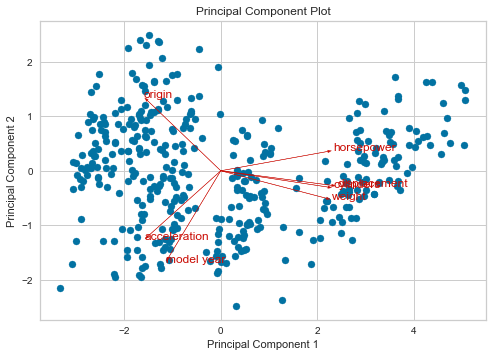

In [15]:
oz = PCADecomposition(scale=True, proj_features=True)
oz.fit_transform(X, y)
oz.poof()

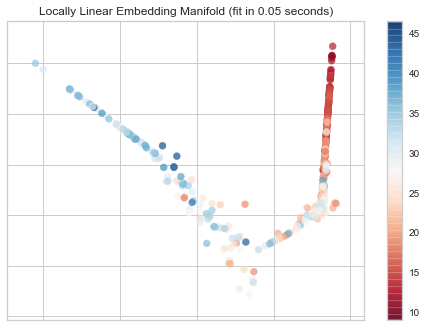

In [16]:
oz = Manifold()
oz.fit_transform(X, y)
oz.poof()

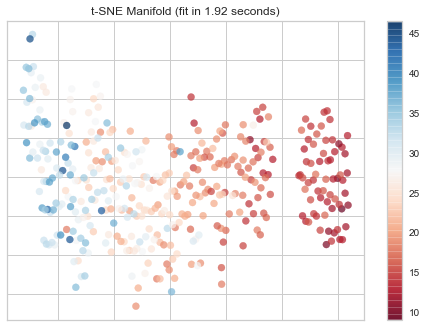

In [17]:
oz = Manifold(manifold='tsne')
oz.fit_transform(X, y)
oz.poof()

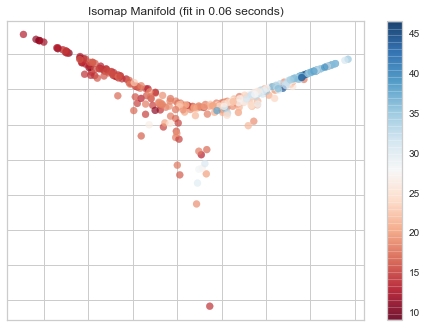

In [18]:
oz = Manifold(manifold='isomap')
oz.fit_transform(X, y)
oz.poof()

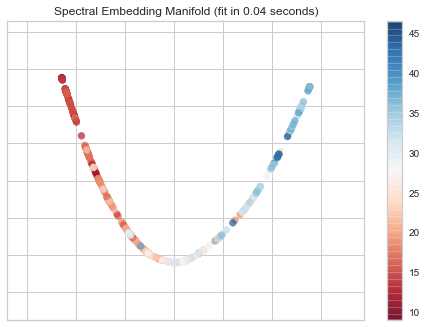

In [19]:
oz = Manifold(manifold='spectral')
oz.fit_transform(X, y)
oz.poof()